In [1]:
import dotenv
dotenv.load_dotenv()

True

In [2]:
from satellite.request import reanalysis_era5_land

---

## `coper` extension basic usage

In [3]:
ds = reanalysis_era5_land(locale="ARG")
ds

2024-10-25 14:48:47,823 INFO [2024-09-28T00:00:00] **Welcome to the New Climate Data Store (CDS)!** This new system is in its early days of full operations and still undergoing enhancements and fine tuning. Some disruptions are to be expected. Your 
[feedback](https://jira.ecmwf.int/plugins/servlet/desk/portal/1/create/202) is key to improve the user experience on the new CDS for the benefit of everyone. Thank you.
2024-10-25 14:48:47,824 WARNING [2024-09-26T00:00:00] Should you have not yet migrated from the old CDS system to the new CDS, please check our [informative page](https://confluence.ecmwf.int/x/uINmFw) for guidance.
2024-10-25 14:48:47,825 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2024-10-25 14:48:47,825 INFO [2024-09-16T00:00:00] Remember that you need to have an ECMWF account to use the new CDS. **Your old CDS credentials will not work in new CDS!**
2024-10-25 14:48:47,826 WARNING [2024-06-16T

<xarray.Dataset> Size: 9MB
Dimensions:     (valid_time: 8, latitude: 351, longitude: 211)
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 64B 2024-10-19 ... 2024-10-19T21:...
  * latitude    (latitude) float64 3kB -21.0 -21.1 -21.2 ... -55.8 -55.9 -56.0
  * longitude   (longitude) float64 2kB -74.0 -73.9 -73.8 ... -53.2 -53.1 -53.0
    expver      (valid_time) <U4 128B ...
Data variables:
    t2m         (valid_time, latitude, longitude) float32 2MB ...
    tp          (valid_time, latitude, longitude) float32 2MB ...
    d2m         (valid_time, latitude, longitude) float32 2MB ...
    sp          (valid_time, latitude, longitude) float32 2MB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-10-25T14:24 GRIB to CDM+CF via cfgrib-0.9.1...

---

## Sandbox (TODO: REMOVE)

In [4]:
from satellite import ADM0, ADM1, ADM2, DataSet
import pandas as pd
import matplotlib.pyplot as plt
import rasterio

In [5]:
gdf = ADM0.get(code="ARG").to_dataframe()
#gdf = pd.concat([adm.to_dataframe() for adm in ADM2.filter(adm0="ARG")]).reset_index(drop=True)
gdf

,code,name,geometry
0,ARG,Argentina,"MULTIPOLYGON (((-68.24164 -54.8755, -68.24108 ..."


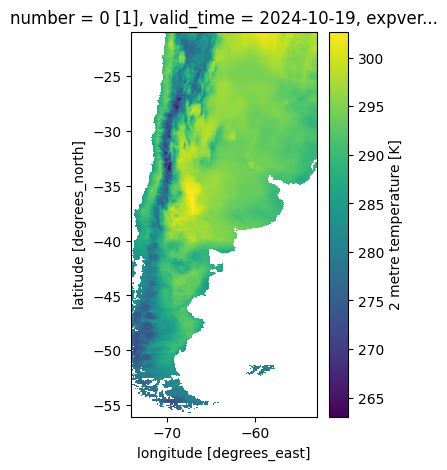

In [6]:
with DataSet.from_netcdf("reanalysis-era5-land_2024-10-19_ARG.nc") as ds:
    fig, ax = plt.subplots(figsize=(3, 5))
    img = ds.t2m.isel(valid_time=0).plot(ax=ax, cmap='viridis')

    plt.show()

In [7]:
with DataSet.from_netcdf("reanalysis-era5-land_2024-10-19_ARG.nc") as ds:
    mask = rasterio.features.rasterize(
        [(geom, 1) for geom in gdf.geometry],
        out_shape=ds.rio.shape,
        transform=ds.rio.transform(),
        fill=0,
        dtype='uint8'
    )
    ds = ds.where(mask)

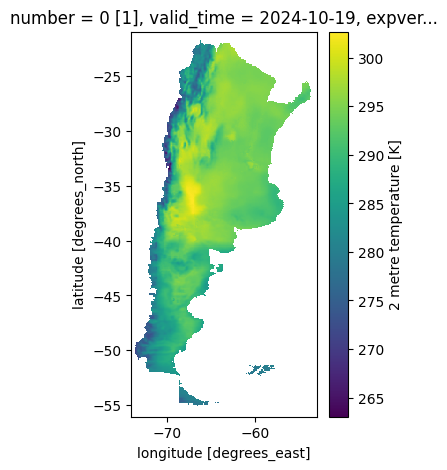

In [8]:
fig, ax = plt.subplots(figsize=(3, 5))
img = ds.t2m.isel(valid_time=0).plot(ax=ax, cmap='viridis')

plt.show()

<Axes: >

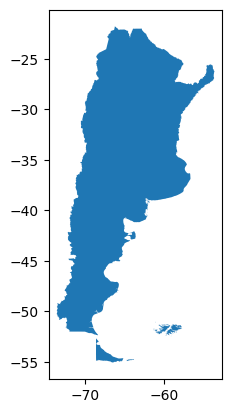

In [9]:
gdf.plot()

In [10]:
gdf = pd.concat([adm.to_dataframe() for adm in ADM1.filter(code=10)+ADM1.filter(code="90")]).reset_index(drop=True)
gdf

,code,name,adm0,geometry
0,10,Catamarca,ARG,"POLYGON ((-65.5949 -29.70813, -65.60121 -29.69..."
1,90,Tucumán,ARG,"POLYGON ((-65.43593 -27.88478, -65.436 -27.885..."


In [11]:
with DataSet.from_netcdf("reanalysis-era5-land_2024-10-19_ARG.nc") as ds:
    mask = rasterio.features.rasterize(
        [(geom, 1) for geom in gdf.geometry],
        out_shape=ds.rio.shape,
        transform=ds.rio.transform(),
        fill=0,
        dtype='uint8'
    )
    ds = ds.where(mask)

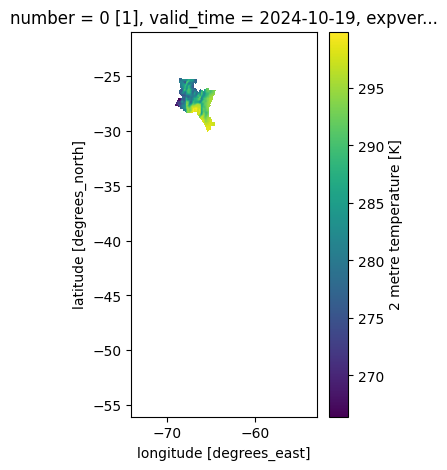

In [12]:
fig, ax = plt.subplots(figsize=(3, 5))
img = ds.t2m.isel(valid_time=0).plot(ax=ax, cmap='viridis')

plt.show()

<Axes: >

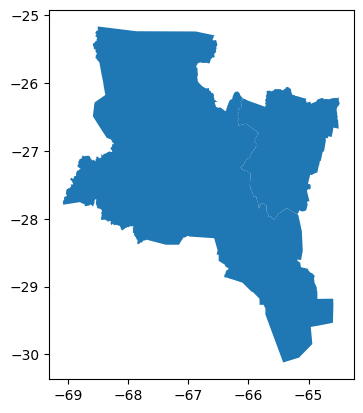

In [13]:
gdf.plot()